In [2]:
!python --version

Python 3.8.3


In [6]:
# import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import os
import copy
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

data40 = pd.read_csv('data40.csv')
# data40 = data40.reset_index()
# # print(data40)
# print(data40.iloc[2:, 20:1])
total_data = data40.iloc[2:, 19:-1]
total_data = total_data.reset_index(drop=True)# reset index
total_data = total_data.astype('int32')
exp_result_data = total_data.iloc[:, 14:]

# print(exp_result_data)
# print(total_data)
# total_data = total_data.reset_index(drop=False) # reset index
total_data = total_data.astype(dtype='int64') # To int


# df = pd.melt(total_data, id_vars='')

total_data_np = total_data.values
total_data_np = total_data_np.astype(np.int64)

print(total_data_np)
print(total_data_np.shape)
list(total_data.columns)
def get_emo_num(name):
        if 'anger' in name.lower()  :
            return 0
        elif 'disgust' in name.lower() :
            return 5
        elif 'fear' in name.lower():
            return 1
        elif "happiness" in name.lower():
            return 2
        elif "sadness" in name.lower():
            return 3
        elif "surprise" in name.lower():
            return 4
        elif "neutral" in name.lower():
            return 6

[[4 3 5 ... 3 5 4]
 [2 4 5 ... 2 2 1]
 [3 1 4 ... 1 2 4]
 ...
 [1 1 5 ... 1 1 5]
 [1 1 6 ... 1 1 3]
 [1 1 6 ... 2 1 3]]
(40, 357)


In [4]:
emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
cols = ['Prototype_aver_{}_{}'.format(j, x) for j in emo_names for x in range(1, 8)] 
cols2 = ['Res_aver_{}_{}'.format(j, x) for j in emo_names for x in range(1, 8)]
cur = []
for i in range(7):
    cur = cur + cols[7*i:7*i+7]
    cur = cur + cols2[7*i:7*i+7]
#     cur = [i for j in cur for i in j]
cols = cur
# print(cols)

In [5]:
# average the rating between namba normal and namba hot
# data structure: anger stimuli-> prototype
emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
# res = []
res = np.zeros([40, 98])
for i in range(40):
    # j means stimulus from emo 1 - emo 7
    # k means 1-7
    for j in range(7):
        for k in range(7):
            # Prototype
            res[i, 2*7*j + k] = exp_result_data.iloc[i, [7*7*j + k, 7*7*j+7 + k]].sum() / 2
            # Res
            res[i, 2*7*j + 7 + k] = exp_result_data.iloc[i, [7*7*j+l*7 + k for l in range(2, 7)]].sum() / 5
# Prototype
print(res)
# print(res.shape)
print(np.array(res).shape)

# print(cols)
res = pd.DataFrame(res, columns=cols)
# print(res.head(50))
average_data = res.copy()

[[4.5 3.5 5.  ... 4.4 4.4 4.6]
 [3.5 2.5 3.  ... 2.  1.6 1.4]
 [5.  6.  2.  ... 1.  1.2 6.4]
 ...
 [3.  3.5 1.  ... 1.  1.  6.2]
 [4.5 1.  1.  ... 1.  1.4 4.4]
 [5.5 1.  1.  ... 1.2 1.  5. ]]
(40, 98)


In [10]:
print(average_data.shape)

(40, 98)


# Please do analysis below.

# Wide format

In [ ]:
def longformat_all():
    emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
    emo_rated_names = 'Anger, Fear, Happiness, Sadness, Surprise, Disgust, Neutral'.lower().split(', ')
#     print(' Anger - 1 - 怒り,\n disgust 6 - 嫌悪,\n fear - 2 - 恐怖,\n happiness - 3 - 幸福, \n sadness - 4 - 悲しみ, \n surprise - 5 - 驚き,\n neutral - 7 - 中性')
# Note that: the number 6 for disgust is the position of the choice for the rated emotion, rather than the rotation of the stimulus.
#     print(total_data.iloc[0:2, :])
    def get_emo_num(name):
        if name.lower() == 'anger':
            return 0
        elif name.lower() == 'disgust':
            return 5
        elif name.lower() == 'fear':
            return 1
        elif name.lower() in ["Happiness", "happiness"]:
            return 2
        elif name.lower() in ["Sadness", "sadness"]:
            return 3
        elif name.lower() in ["Surprise", "surprise"]:
            return 4
        elif name.lower() in ["Neutral", "neutral"]:
            return 6
    DF_ALL = []
    
    for i in range(1):
    # stimulus rotation is Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral
        current_emo = emo_names[i]
        print('current stimulus emo is ', current_emo)
        temp_data = total_data.iloc[:, 14+7*7*i : 14+7*7*i + 7*7].copy()
#         temp_data = temp_data.iloc[:, :21]
        # print(temp_data.head())
        temp_data_with_rating = temp_data.reset_index(drop=False)
        print(list(temp_data_with_rating.columns)[:])
        # df = pd.melt(temp_data_with_rating, id_vars=['index'], value_vars=list(temp_data_with_rating.columns)[1:],
                     # var_name='stimulus_type', value_name='rating')
        # print(df)
        newcolumn = [[x for _ in range(40)] for x in emo_rated_names] * 7
        newcolumn = [i for item in newcolumn for i in item]
        df.insert(2, 'stimulus_emotion', current_emo)
        df.insert(3, 'rated_emotion', newcolumn)

        def cleanthedf(x):
            if 'normal' in x:
                return 'Prototype'
            elif 'hot' in x:
                return 'Prototype with opening mouth'
            else:
                return 'BO-based-' + x[-3]

        df['stimulus_type'] = df['stimulus_type'].apply(lambda x: cleanthedf(x))

        if type(DF_ALL) is list:
            DF_ALL = df.copy()
        else:
            DF_ALL = pd.concat([DF_ALL, df], ignore_index=True)
#         print(df)
    print(DF_ALL)
    DF_ALL.to_csv('data40_longformat_ALL.csv')
longformat_all()



# 6/28 plot bar figure

In [ ]:
# Fig 1



# 6/3/2022 49 1-way ANOVA

In [ ]:
def longformat_all():
    emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
    emo_rated_names = 'Anger, Fear, Happiness, Sadness, Surprise, Disgust, Neutral'.lower().split(', ')
#     print(' Anger - 1 - 怒り,\n disgust 6 - 嫌悪,\n fear - 2 - 恐怖,\n happiness - 3 - 幸福, \n sadness - 4 - 悲しみ, \n surprise - 5 - 驚き,\n neutral - 7 - 中性')
# Note that: the number 6 for disgust is the position of the choice for the rated emotion, rather than the rotation of the stimulus.
#     print(total_data.iloc[0:2, :])
    def get_emo_num(name):
        if name.lower() == 'anger':
            return 0
        elif name.lower() == 'disgust':
            return 5
        elif name.lower() == 'fear':
            return 1
        elif name.lower() in ["Happiness", "happiness"]:
            return 2
        elif name.lower() in ["Sadness", "sadness"]:
            return 3
        elif name.lower() in ["Surprise", "surprise"]:
            return 4
        elif name.lower() in ["Neutral", "neutral"]:
            return 6
    DF_ALL = []
    
    for i in range(7):
    # stimulus rotation is Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral
        current_emo = emo_names[i]
        print('current stimulus emo is ', current_emo)
        temp_data = total_data.iloc[:, 14+7*7*i : 14+7*7*i + 7*7].copy()
#         temp_data = temp_data.iloc[:, :21]
        # print(temp_data.head())
        temp_data_with_rating = temp_data.reset_index(drop=False)
        print(list(temp_data_with_rating.columns)[:])
        df = pd.melt(temp_data_with_rating, id_vars=['index'], value_vars=list(temp_data_with_rating.columns)[1:],
                     var_name='stimulus_type', value_name='rating')
        # print(df)
        newcolumn = [[x for _ in range(40)] for x in emo_rated_names] * 7
        newcolumn = [i for item in newcolumn for i in item]
        df.insert(2, 'stimulus_emotion', current_emo)
        df.insert(3, 'rated_emotion', newcolumn)

        def cleanthedf(x):
            if 'normal' in x:
                return 'Prototype'
            elif 'hot' in x:
                return 'Prototype with opening mouth'
            else:
                return 'BO-based-' + x[-3]

        df['stimulus_type'] = df['stimulus_type'].apply(lambda x: cleanthedf(x))

        if type(DF_ALL) is list:
            DF_ALL = df.copy()
        else:
            DF_ALL = pd.concat([DF_ALL, df], ignore_index=True)
#         print(df)
    # print(DF_ALL)
    DF_ALL.to_csv('data40_longformat_ALL.csv')
longformat_all()


In [30]:
40*7*7*7

13720

In [ ]:
# 49 one way
for i in emo_names:
    for j in emo_names:
        print("current is {}-{}".format(i, j))
        temp_data = total_data.iloc[:, 14+7*7*empos : 14+7*7*empos + 7*7].copy()
        print(temp_data)

# 6/29/2022 2-way ANOVA for aver data

In [29]:
# get long format for two way anova
emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
emo_rated_names = 'Anger, Fear, Happiness, Sadness, Surprise, Disgust, Neutral'.lower().split(', ')
#     print(' Anger - 1 - 怒り,\n disgust 6 - 嫌悪,\n fear - 2 - 恐怖,\n happiness - 3 - 幸福, \n sadness - 4 - 悲しみ, \n surprise - 5 - 驚き,\n neutral - 7 - 中性')
# Note that: the number 6 for disgust is the position of the choice for the rated emotion, rather than the rotation of the stimulus.
#     print(total_data.iloc[0:2, :])
def get_emo_num(name):
    if name.lower() == 'anger':
        return 0
    elif name.lower() == 'disgust':
        return 5
    elif name.lower() == 'fear':
        return 1
    elif name.lower() in ["Happiness", "happiness"]:
        return 2
    elif name.lower() in ["Sadness", "sadness"]:
        return 3
    elif name.lower() in ["Surprise", "surprise"]:
        return 4
    elif name.lower() in ["Neutral", "neutral"]:
        return 6
DF_ALL = []
    
for i in range(7):
# stimulus rotation is Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral
    current_emo = emo_names[i]
    print('current stimulus emo is ', current_emo)
    temp_data = average_data.iloc[:, 2*7*i : 2*7*i + 2*7].copy()
#     print(temp_data.head())
    temp_data_with_rating = temp_data.reset_index(drop=False)
#     print(list(temp_data_with_rating.columns)[:])
    df = pd.melt(temp_data_with_rating, id_vars=['index'], value_vars=list(temp_data_with_rating.columns)[1:],
                 var_name='stimulus_type', value_name='rating')
    # print(df)
    newcolumn = [[x for _ in range(40)] for x in emo_rated_names] * 2
    newcolumn = [i for item in newcolumn for i in item]
    df.insert(2, 'stimulus_emotion', current_emo)
    df.insert(3, 'rated_emotion', newcolumn)

    def cleanthedf(x):
        if 'Prototype' in x:
            return 'Prototype'
        elif 'Res' in x:
            return 'Res'
        else:
            raise error

    df['stimulus_type'] = df['stimulus_type'].apply(lambda x: cleanthedf(x))

    if type(DF_ALL) is list:
        DF_ALL = df.copy()
    else:
        DF_ALL = pd.concat([DF_ALL, df], ignore_index=True)
#         print(df)
print(DF_ALL.info)
# DF_ALL.to_csv('data40_longformat_ALL.csv')

# two way ANOVA
# the within subject model 
import pingouin as pg

# perform two-way repeated measures ANOVA
twoway_re_me_anova = pg.rm_anova(dv='rating', within=['stimulus_type', 'stimulus_emotion'], subject='index', data=DF_ALL)

# Optional post-hoc tests
post_hoc_tests = pg.pairwise_ttests(dv='rating', within=['stimulus_type', 'stimulus_emotion'], subject='index', data=DF_ALL)

current stimulus emo is  anger
current stimulus emo is  disgust
current stimulus emo is  fear
current stimulus emo is  happiness
current stimulus emo is  sadness
current stimulus emo is  surprise
current stimulus emo is  neutral
<bound method DataFrame.info of       index stimulus_type stimulus_emotion rated_emotion  rating
0         0     Prototype            anger         anger     4.5
1         1     Prototype            anger         anger     3.5
2         2     Prototype            anger         anger     5.0
3         3     Prototype            anger         anger     1.5
4         4     Prototype            anger         anger     5.5
...     ...           ...              ...           ...     ...
3915     35           Res          neutral       neutral     6.4
3916     36           Res          neutral       neutral     2.8
3917     37           Res          neutral       neutral     6.2
3918     38           Res          neutral       neutral     4.4
3919     39           Re

In [30]:
3920/40/7

14.0

In [21]:
twoway_re_me_anova

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,stimulus_type,0.763050,1,39,0.763050,12.520648,1.057926e-03,1.057926e-03,0.243022,1.000000
1,stimulus_emotion,40.695060,6,234,6.782510,41.354203,3.506835e-34,1.565188e-14,0.514649,0.382138
2,stimulus_type * stimulus_emotion,3.147407,6,234,0.524568,8.182256,4.809240e-08,7.799720e-07,0.173418,0.800676


In [28]:
post_hoc_tests.to_csv('post_hoc_tests.csv')

current emo is  anger
   Namba normal An_1  Namba normal An_2  Namba normal An_3  Namba normal An_4  \
0                  4                  3                  5                  4   
1                  5                  3                  2                  2   
2                  5                  6                  1                  5   
3                  1                  2                  3                  1   
4                  6                  4                  1                  4   

   Namba normal An_5  Namba normal An_6  Namba normal An_7  Namba hot Anger_1  \
0                  5                  6                  5                  5   
1                  3                  3                  4                  2   
2                  4                  6                  1                  5   
3                  1                  2                  2                  2   
4                  2                  5                  2                  5   

   N

In [4]:
import numpy

In [ ]:
# Switch the format

In [93]:
print('The rotation is:')
print(' 1 - 怒り - anger,\n 2 - 恐怖 - fear,\n 3 - 幸福 - happiness, \n 4 - 悲しみ - sadness, \n 5 - 驚き - surprise,\n 6 - 嫌悪 - disgust, \n 7 - 中性 - neutral')

The rotation is:
 1 - 怒り - anger,
 2 - 恐怖 - fear,
 3 - 幸福 - happiness, 
 4 - 悲しみ - sadness, 
 5 - 驚き - surprise,
 6 - 嫌悪 - disgust, 
 7 - 中性 - neutral


# Analysis 2
# Final selection result

In [2]:
!pwd

/Users/dongshengyang/Downloads/iMacResearch/github/CameraControl


In [4]:
import os
import pandas as pd

# Py-feat data
# namba_nor_rating
BOA_final_select = {}
BOA_final_select['anger'] = [[0, '2021_12_23_15_32_12_anger_772.csv'], [3, '2021_12_23_15_27_09_anger_212.csv'], [5, '2021_12_23_15_31_17_anger_672.csv'], [8, '2021_12_23_15_30_17_anger_562.csv'], [9, '2021_12_23_15_33_23_anger_902.csv']]
BOA_final_select['disgust'] = [[0, '2021_12_23_15_42_21_disgust_822.csv'], [2, '2021_12_23_15_36_37_disgust_182.csv'], [7, '2021_12_23_15_42_43_disgust_862.csv'], [8, '2021_12_23_15_36_58_disgust_222.csv'], [9, '2021_12_23_15_36_16_disgust_142.csv']]
BOA_final_select['fear'] = [[0, '2021_12_23_15_50_44_fear_792.csv'], [3, '2021_12_23_15_46_42_fear_322.csv'], [5, '2021_12_23_15_50_03_fear_712.csv'], [6, '2021_12_23_15_52_23_fear_982.csv'], [9, '2021_12_23_15_51_09_fear_842.csv']]
BOA_final_select['happiness'] = [[0, '2021_12_23_16_02_49_happiness_982.csv'], [2, '2021_12_23_15_56_09_happiness_242.csv'], [5, '2021_12_23_15_57_14_happiness_362.csv'], [7, '2021_12_23_16_01_09_happiness_792.csv'], [9, '2021_12_23_16_01_03_happiness_782.csv']]
BOA_final_select['sadness'] = [[0, '2021_12_23_16_08_31_sadness_622.csv'], [1, '2021_12_23_16_10_19_sadness_822.csv'], [2, '2021_12_23_16_09_41_sadness_752.csv'], [3, '2021_12_23_16_11_40_sadness_972.csv'], [6, '2021_12_23_16_10_03_sadness_792.csv']]
BOA_final_select['surprise'] = [[0, '2021_12_23_16_16_59_surprise_422.csv'], [1, '2021_12_23_16_21_15_surprise_862.csv'], [4, '2021_12_23_16_19_35_surprise_692.csv'], [7, '2021_12_23_16_20_33_surprise_792.csv'], [8, '2021_12_23_16_21_09_surprise_852.csv']]
BOA_final_select['neutral'] =  [[0, '2021_12_23_16_55_37_neutral_762.csv'], [2, '2021_12_23_16_55_43_neutral_772.csv'], [3, '2021_12_23_16_57_14_neutral_922.csv'], [5, '2021_12_23_16_57_08_neutral_912.csv'], [6, '2021_12_23_16_54_23_neutral_632.csv']]
# print(BOA_final_select['anger'][0][1])
# print(os.path.exists(BOA_final_select_folder_path + BOA_final_select['anger'][0][1][:-4] + '_emotion.csv' ))
temp_folder = ['prototypeFacialExpressions', 'hotFacialExpressions']
namba_select = {} 
namba_select_folder_path = 'ros_dongagent_ws/src/dongagent_package/scripts/image_analysis/selected_files_OnlineExp/Namba_Coding/Exp8/'
for i in temp_folder: 
    for j in os.listdir(namba_select_folder_path + i):
        if 'emotion' not in j:
            continue
        if j.split('_')[-2][:-1].lower() in namba_select.keys():
            namba_select[j.split('_')[-2][:-1].lower()].append(i + '/' + j)
        else:
            namba_select[j.split('_')[-2][:-1].lower()] = [i + '/' + j]
#         namba_select[]
# print(namba_select)
# print(os.listdir(namba_select_folder_path))
print(os.path.exists(namba_select_folder_path + namba_select['neutral'][0]))

pyfeat_rating = {}


for target_emotion in 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', '):
# for target_emotion in ['disgust']:
# target_emotion = 'anger'
    BOA_final_select_folder_path = 'ros_dongagent_ws/src/dongagent_package/scripts/image_analysis/selected_files_OnlineExp/BOA_optimized/' + target_emotion + '/'

    pyfeat_rating[target_emotion] = []
    # namba normal
    tempnamba = pd.read_csv(namba_select_folder_path + namba_select[target_emotion][0])
#     print(round(tempnamba[target_emotion].values[0], 6))
    pyfeat_rating[target_emotion].append(round(tempnamba[target_emotion].values[0], 6))
    # namba normal hot
    if target_emotion != 'neutral':
        tempnamba = pd.read_csv(namba_select_folder_path + namba_select[target_emotion][1])
#         print(tempnamba)
#         print(round(tempnamba[target_emotion].values[0], 6))
        pyfeat_rating[target_emotion].append(round(tempnamba[target_emotion].values[0], 6))
    else:
        pyfeat_rating[target_emotion].append(round(tempnamba[target_emotion].values[0], 6))
    
    for i in range(5):
        temp = pd.read_csv(BOA_final_select_folder_path + BOA_final_select[target_emotion][i][1][:-4] + '_emotion.csv')
#         print(round(temp[target_emotion].values[0], 6))
        pyfeat_rating[target_emotion].append(round(temp[target_emotion].values[0], 6))
    
print(pyfeat_rating)

True
{'anger': [0.070583, 0.81069, 0.936236, 0.931665, 0.927082, 0.914131, 0.913679], 'disgust': [0.000917, 0.000288, 0.827066, 0.804087, 0.767849, 0.76772, 0.756644], 'fear': [0.122994, 0.29998, 0.836327, 0.786653, 0.741456, 0.695252, 0.619278], 'happiness': [0.732239, 0.148244, 0.895467, 0.856129, 0.844299, 0.837262, 0.822102], 'sadness': [0.251955, 0.241967, 0.912592, 0.909977, 0.903788, 0.874338, 0.866104], 'surprise': [0.667781, 0.972414, 0.972415, 0.971868, 0.94906, 0.936967, 0.931813], 'neutral': [0.955426, 0.955426, 0.894728, 0.869838, 0.863559, 0.850641, 0.841315]}


## Figure 1

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


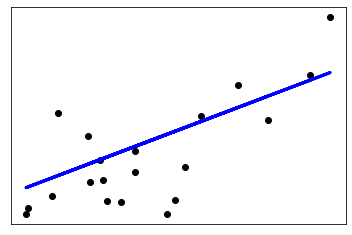

In [28]:
# Example
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()
# print(diabetes_X_train, diabetes_y_train)
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

current emo is: anger
current emo is: disgust
current emo is: fear
current emo is: happiness
current emo is: sadness
current emo is: surprise
current emo is: neutral


/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error o

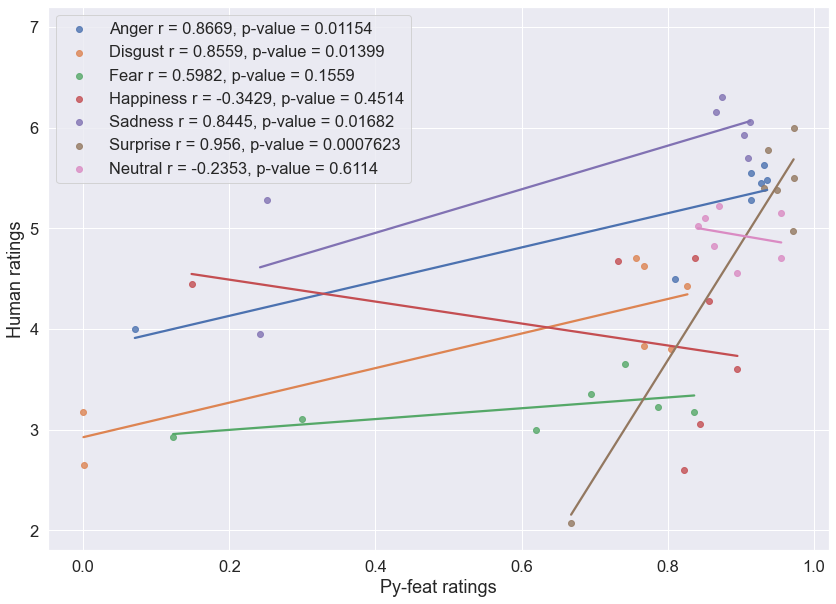

In [7]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
# print(total_data.head())

def get_emo_num(name):
    if name.lower() == 'anger':
        return 0
    elif name.lower() == 'disgust':
        return 5
    elif name.lower() == 'fear':
        return 1
    elif name.lower() in ["Happiness", "happiness"]:
        return 2
    elif name.lower() in ["Sadness", "sadness"]:
        return 3
    elif name.lower() in ["Surprise", "surprise"]:
        return 4
    elif name.lower() in ["Neutral", "neutral"]:
        return 6
    
sns.set(font_scale=1.5)
emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
form_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.split(', ')
# id = 1
fig, ax = plt.subplots(figsize=(14, 10)) # set figure size
# plt.xlim(-0.05, 1.05)
plt.ylim(1.8, 7.2)
fig.set_facecolor('white') # set background color
for i in range(7):
#     if i != id:
#         continue
    current_emo = emo_names[i]
    print('current emo is:', current_emo)
    temp_data = total_data.iloc[:, 14+7*7*i : 14+7*7*i + 7*7].copy()
    temp_data_with_temp_rating = temp_data.iloc[:,[ get_emo_num(current_emo) + 7 * x for x in range(7)]]

#     fig, ax = plt.subplots(figsize=(14, 8)) # set figure size
#     fig.set_facecolor('white') # set background color
    # ---------------
    # plt.figure(figsize=(14, 8))
    # x = pyfeat_rating[emo_names[id]][i]
    # print(x)
    # y = temp_data_with_temp_rating[temp_data_with_temp_rating.columns[i]]
    x = []
    y = []
    fig_data = []
    for j in range(len(temp_data_with_temp_rating.columns)):
        temp_x = pyfeat_rating[current_emo][j]
        x.append(temp_x)
        temp_y = temp_data_with_temp_rating[temp_data_with_temp_rating.columns[j]]
        y.append(np.mean(temp_y))
        fig_data.append([temp_x, np.mean(temp_y)])
    fig_data = sorted(fig_data, key=lambda x:x[0]) 
    fig_data = np.array(fig_data)
    fig_data = fig_data.transpose()
    temp_emo = current_emo
    for item in fig_data[0]:
        item = [item]
#     print('fig_data', fig_data)

    # LinearRegression
    X, y = fig_data[0], fig_data[1]
    # print(X, y)
    X = X[:, None] # Reshape to 2D as requested
    reg = LinearRegression()
    reg.fit(X, y)
    # print('coefficient of determination:', reg.score(X, y))
#     print('intercept', reg.intercept_, '\nslope', reg.coef_[0] )
#     print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_, reg.coef_[0]))
    
    # Predict response
    predictions = reg.predict(X)
    
    # pearsonr
    #     my_corrcoef = stats.pearsonr(fig_data[0], y)
    #     print('my_corrcoef', my_corrcoef)

    #     my_rho = np.corrcoef(fig_data[0], y)
    #     print('my_rho', my_rho)
    
    # Use stats linregress library
    reg2 = stats.linregress(fig_data[0], y)
    # print(reg2)
    # print("The linear model is: Y = {:.5} + {:.5}X".format(reg2.intercept, reg2.slope))
#     print(reg2.rvalue, reg2.pvalue)
    
#     plt.scatter(fig_data[0], fig_data[1], label=temp_emo)
#     plt.plot(fig_data[0], predictions, linewidth=2)
    sns.regplot(fig_data[0], fig_data[1], ci=None, label=temp_emo.capitalize() + ' r = {:.4}, p-value = {:.4}'.format(reg2.rvalue, reg2.pvalue))
    plt.xlabel('Py-feat ratings')
    plt.ylabel('Human ratings')
    plt.legend()
#     print(temp_data_with_temp_rating.columns[i])
fig.savefig('pyfeatwithrating.png', dpi=300)
# sns.scatterplot(data, x="total_bill", y="tip")

## Figure 2: 7 figures for all ratings

current stimuli emo is: anger


NameError: name 'pyfeat_rating' is not defined

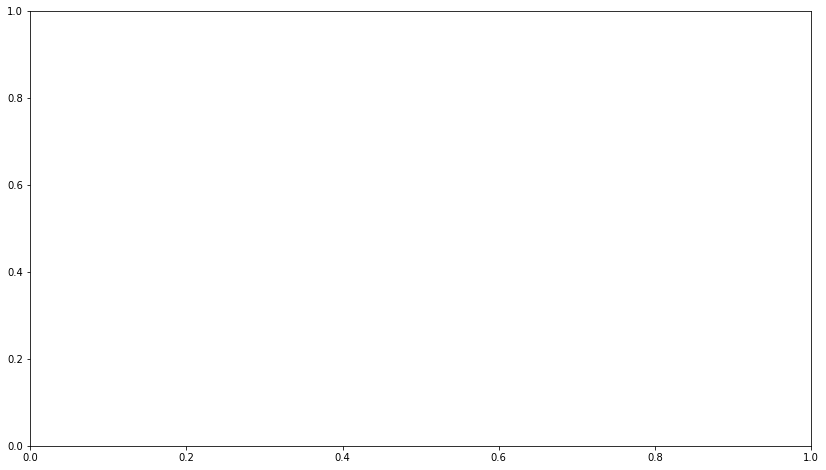

In [8]:
import seaborn as sns
# print(total_data.head())

def get_emo_num(name):
    if name.lower() == 'anger':
        return 0
    elif name.lower() == 'disgust':
        return 5
    elif name.lower() == 'fear':
        return 1
    elif name.lower() in ["Happiness", "happiness"]:
        return 2
    elif name.lower() in ["Sadness", "sadness"]:
        return 3
    elif name.lower() in ["Surprise", "surprise"]:
        return 4
    elif name.lower() in ["Neutral", "neutral"]:
        return 6
            
emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
id = 0
# fig, ax = plt.subplots(figsize=(14, 8)) # set figure size
# fig.set_facecolor('white') # set background color

# stimuli emo loop
for i in range(7):
#     if i != id:
#         continue
    current_stim_emo = emo_names[i]
    print('current stimuli emo is:', current_stim_emo)
    temp_data = total_data.iloc[:, 14+7*7*i : 14+7*7*i + 7*7].copy()
#     print(temp_data.head())
    # target emo rating loop
    
     # plotting 
    fig, ax = plt.subplots(figsize=(14, 8)) # set figure size
    fig.set_facecolor('white') # set background color
    
    for j in range(7):
        current_target_emo = emo_names[j]
        temp_data_with_temp_rating = temp_data.iloc[:,[ get_emo_num(current_target_emo) + 7 * x for x in range(7)]]
        fig_data = []
        for k in range(len(temp_data_with_temp_rating.columns)):
            temp_x = pyfeat_rating[current_stim_emo][k]
            temp_y = temp_data_with_temp_rating[temp_data_with_temp_rating.columns[k]]
            fig_data.append([temp_x, np.mean(temp_y)])
        fig_data = sorted(fig_data, key=lambda x:x[0]) 
        fig_data = np.array(fig_data)
        fig_data = fig_data.transpose()
        temp_emo = current_target_emo
        
        
       
        
        plt.plot(fig_data[0], fig_data[1], label=temp_emo + ' rating')
        print(fig_data[0])
        plt.xlabel('py-feat ratings')
        plt.ylabel('human ratings')
        plt.title(current_stim_emo, y=-0.12)
        plt.legend()
    plt.show()
    fig.savefig(current_stim_emo +'.png', dpi=100)
    
#     fig, ax = plt.subplots(figsize=(14, 8)) # set figure size
#     fig.set_facecolor('white') # set background color
    # ---------------
    # plt.figure(figsize=(14, 8))
    # x = pyfeat_rating[emo_names[id]][i]
    # print(x)
    # y = temp_data_with_temp_rating[temp_data_with_temp_rating.columns[i]]
    
    
    
    

#     plt.plot(fig_data[0], fig_data[1], label=temp_emo)
# #     plt.plot(x, y, label=temp_emo)
# #     # plt.plot(x, y, label=temp_data_with_temp_rating.columns[i])
#     plt.xlabel('py-feat ratings')
#     plt.ylabel('human ratings')
#     plt.legend()
# #     print(temp_data_with_temp_rating.columns[i])
#     fig.savefig('pyfeatwithrating.png')
# sns.scatterplot(data, x="total_bill", y="tip")

In [43]:
a = np.array([0.070583, 0.81069,  0.936236, 0.931665, 0.927082, 0.914131, 0.913679])
print(a)
sorted(a, key=lambda x:x)
print(a)

[0.070583 0.81069  0.936236 0.931665 0.927082 0.914131 0.913679]
[0.070583 0.81069  0.936236 0.931665 0.927082 0.914131 0.913679]


In [ ]:
print(total_data_np.mean(axis=0))

In [3]:
practiceHA_data = total_data.iloc[:, 0:7].copy()

In [ ]:
print(anger_only_data)

# Namba normal, Namba hot, BOA 0
## One-way repeated measures ANOVA

In [17]:
def multiple_analysis_1_with_fig(id):
    emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
#     print(' Anger - 1 - 怒り,\n disgust 6 - 嫌悪,\n fear - 2 - 恐怖,\n happiness - 3 - 幸福, \n sadness - 4 - 悲しみ, \n surprise - 5 - 驚き,\n neutral - 7 - 中性')
#     print(total_data.iloc[0:2, :])
    def get_emo_num(name):
        if name.lower() == 'anger':
            return 0
        elif name.lower() == 'disgust':
            return 5
        elif name.lower() == 'fear':
            return 1
        elif name.lower() in ["Happiness", "happiness"]:
            return 2
        elif name.lower() in ["Sadness", "sadness"]:
            return 3
        elif name.lower() in ["Surprise", "surprise"]:
            return 4
        elif name.lower() in ["Neutral", "neutral"]:
            return 6
            
        
        
    for i in range(7):
        if i != id:
            continue
        current_emo = emo_names[i]
        print('current emo is ', current_emo)
        temp_data = total_data.iloc[:, 14+7*7*i : 14+7*7*i + 7*7].copy()
#         print(temp_data.head())
        temp_data_with_temp_rating = temp_data.iloc[:,[ get_emo_num(current_emo) + 7 * x for x in range(3)]]
#         print(temp_data_with_temp_rating.head())
        temp_data_with_temp_rating = temp_data_with_temp_rating.reset_index(drop=False)
#         print(list(temp_data_with_temp_rating.columns)[:])
        df = pd.melt(temp_data_with_temp_rating, id_vars='index', value_vars=list(temp_data_with_temp_rating.columns)[1:],
                     var_name='stimulus', value_name='rating')
        # print('df is')
        # print(df)
        # print(df.to_csv(current_emo + '__data40.csv'))
        # one-way repeated measures ANOVA
        # the within subject model 
        import pingouin as pg
        res = pg.rm_anova(dv='rating', within='stimulus', subject='index', data=df,detailed=True)
        print()
        print(res)
        print()

        from statsmodels.stats.multicomp import MultiComparison
        #Then, do the multiple testing in Tukey's test
        mc = MultiComparison(df['rating'], df['stimulus'])
#         print(mc.tukeyhsd().summary())
#         # Show the group names
#         print(mc.groupsunique)

        # Instead of the Tukey's test, we can do pairwise t-test
        # First, with the "Holm" correction
        rtp = mc.allpairtest(stats.ttest_rel, method='Holm')
        print('Multiple Comparison Using Holm method')
        print((rtp[0]))

In [18]:
multiple_analysis_1_with_fig(0)

current emo is  anger

     Source          SS  DF         MS          F     p-unc      np2       eps
0  stimulus   45.016667   2  22.508333  12.278704  0.000023  0.23945  0.983413
1     Error  142.983333  78   1.833120        NaN       NaN      NaN       NaN

Multiple Comparison Using Holm method
Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacBonf=0.017
      group1            group2       stat   pval  pval_corr reject
------------------------------------------------------------------
    BOA Anger 0_1 Namba hot Anger_1 3.2434 0.0024    0.0048   True
    BOA Anger 0_1 Namba normal An_1  4.606    0.0    0.0001   True
Namba hot Anger_1 Namba normal An_1 1.7455 0.0888    0.0888  False
------------------------------------------------------------------


In [34]:
multiple_analysis_1_with_fig(1)

current emo is  disgust

     Source          SS  DF         MS          F         p-unc       np2  \
0  stimulus   66.516667   2  33.258333  21.237413  4.332449e-08  0.352562   
1     Error  122.150000  78   1.566026        NaN           NaN       NaN   

        eps  
0  0.990457  
1       NaN  

Multiple Comparison Using Holm method
Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacBonf=0.017
       group1              group2        stat   pval  pval_corr reject
----------------------------------------------------------------------
    BOA Disgust 0_6 Namba hot Disgust_6 4.3054 0.0001    0.0002   True
    BOA Disgust 0_6   Namba normal Di_6  6.655    0.0       0.0   True
Namba hot Disgust_6   Namba normal Di_6 1.8623 0.0701    0.0701  False
----------------------------------------------------------------------


In [40]:
multiple_analysis_1_with_fig(2)

current emo is  fear

     Source         SS  DF        MS         F     p-unc      np2      eps
0  stimulus   1.316667   2  0.658333  0.611188  0.545284  0.01543  0.99347
1     Error  84.016667  78  1.077137       NaN       NaN      NaN      NaN

Multiple Comparison Using Holm method
Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacBonf=0.017
    group1           group2       stat   pval  pval_corr reject
---------------------------------------------------------------
  BOA Fear 0_2    Namba hot fe_2 0.3217 0.7494    0.9091  False
  BOA Fear 0_2 Namba normal Fe_2 1.0437  0.303    0.9091  False
Namba hot fe_2 Namba normal Fe_2 0.7838 0.4379    0.9091  False
---------------------------------------------------------------


In [36]:
multiple_analysis_1_with_fig(3)

current emo is  happiness

     Source          SS  DF         MS         F     p-unc       np2       eps
0  stimulus   25.716667   2  12.858333  9.094303  0.000282  0.189093  0.980042
1     Error  110.283333  78   1.413889       NaN       NaN       NaN       NaN

Multiple Comparison Using Holm method
Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacBonf=0.017
      group1            group2        stat   pval  pval_corr reject
-------------------------------------------------------------------
BOA Happiness 0_3    Namba hot ha_3 -3.0508 0.0041    0.0082   True
BOA Happiness 0_3 Namba normal Ha_3 -3.9632 0.0003    0.0009   True
   Namba hot ha_3 Namba normal Ha_3 -0.9119 0.3674    0.3674  False
-------------------------------------------------------------------


In [41]:
multiple_analysis_1_with_fig(4)

current emo is  sadness

     Source          SS  DF         MS          F         p-unc       np2  \
0  stimulus   90.216667   2  45.108333  32.049036  6.930272e-11  0.451083   
1     Error  109.783333  78   1.407479        NaN           NaN       NaN   

        eps  
0  0.916929  
1       NaN  

Multiple Comparison Using Holm method
Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacBonf=0.017
     group1           group2        stat   pval  pval_corr reject
-----------------------------------------------------------------
BOA Sadness 0_4    Namba hot sa_4  7.2858    0.0       0.0   True
BOA Sadness 0_4 Namba normal Sa_4  3.4889 0.0012    0.0012   True
 Namba hot sa_4 Namba normal Sa_4 -4.7231    0.0    0.0001   True
-----------------------------------------------------------------


In [42]:
multiple_analysis_1_with_fig(5)

current emo is  surprise

     Source          SS  DF          MS           F         p-unc  \
0  stimulus  365.150000   2  182.575000  132.452488  8.315949e-26   
1     Error  107.516667  78    1.378419         NaN           NaN   

      p-GG-corr       np2       eps sphericity   W-spher   p-spher  
0  1.790617e-22  0.772532  0.857275      False  0.833513  0.031429  
1           NaN       NaN       NaN        NaN       NaN       NaN  

Multiple Comparison Using Holm method
Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacBonf=0.017
     group1            group2         stat   pval  pval_corr reject
-------------------------------------------------------------------
BOA Surprise 0_5    Namba hot Sur_5 -2.3948 0.0215    0.0215   True
BOA Surprise 0_5 Namba normal Sur_5 11.2819    0.0       0.0   True
 Namba hot Sur_5 Namba normal Sur_5 14.7293    0.0       0.0   True
-------------------------------------------------------------------


In [44]:
multiple_analysis_1_with_fig(6)

current emo is  neutral

     Source     SS  DF        MS         F     p-unc  p-GG-corr      np2  \
0  stimulus    7.8   2  3.900000  1.998686  0.142394   0.152201  0.04875   
1     Error  152.2  78  1.951282       NaN       NaN        NaN      NaN   

        eps sphericity   W-spher  p-spher  
0  0.808224      False  0.762719  0.00582  
1       NaN        NaN       NaN      NaN  

Multiple Comparison Using Holm method
Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacBonf=0.017
     group1           group2         stat   pval  pval_corr reject
------------------------------------------------------------------
BOA Neutral 0_7    Namba hot Neu_7 -2.6234 0.0124    0.0371   True
BOA Neutral 0_7 Namba normal Neu_7 -0.4117 0.6828    0.6828  False
Namba hot Neu_7 Namba normal Neu_7  1.3717  0.178     0.356  False
------------------------------------------------------------------


     index           stimulus  rating
0        0  Namba normal An_1       4
1        1  Namba normal An_1       5
2        2  Namba normal An_1       5
3        3  Namba normal An_1       1
4        4  Namba normal An_1       6
..     ...                ...     ...
115     35      BOA Anger 0_1       5
116     36      BOA Anger 0_1       5
117     37      BOA Anger 0_1       6
118     38      BOA Anger 0_1       6
119     39      BOA Anger 0_1       7

[120 rows x 3 columns]
                   count   mean       std  min   25%  50%   75%  max
Namba normal An_1   40.0  4.000  1.585188  1.0  3.00  4.0  5.00  7.0
Namba hot Anger_1   40.0  4.500  1.739437  1.0  3.75  5.0  6.00  7.0
BOA Anger 0_1       40.0  5.475  1.584986  1.0  5.00  6.0  6.25  7.0
     Source          SS  DF         MS          F     p-unc      np2       eps
0  stimulus   45.016667   2  22.508333  12.278704  0.000023  0.23945  0.983413
1     Error  142.983333  78   1.833120        NaN       NaN      NaN       NaN
       

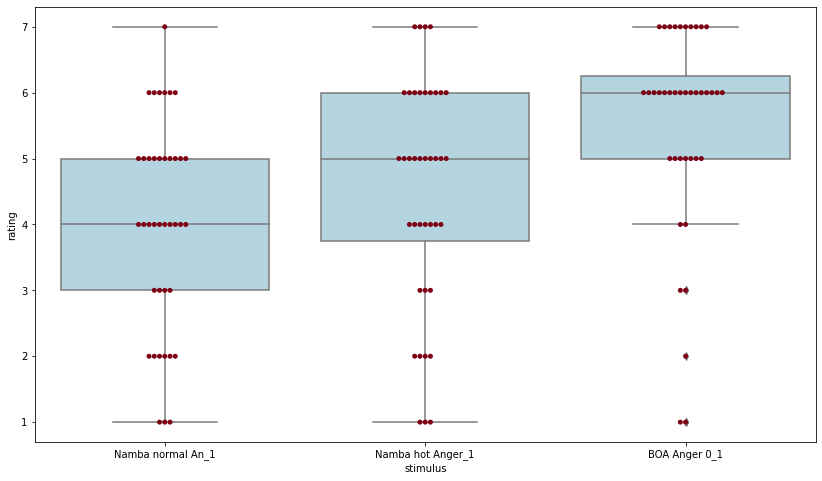

In [130]:
# anger total
anger_data = total_data.iloc[:, 14:14+7*7].copy()
# print(anger_data)
anger_only_data = anger_data.iloc[:, [0, 7, 14]]
anger_data_with_an_rating = anger_only_data.reset_index(drop=False)
# print(anger_data_with_an_rating)
# melt from the wide format to long format
anger_only_df = pd.melt(anger_data_with_an_rating, id_vars='index', value_vars=list(anger_data_with_an_rating.columns)[1:],
             var_name='stimulus', value_name='rating')
print(anger_only_df)
summary = anger_only_data.describe()
summary = summary.transpose()
print(summary.head())

plt.figure(figsize=(14, 8))
ax2 = sns.boxplot(x="stimulus", y="rating", data=anger_only_df, color='lightblue')
ax2 = sns.swarmplot(x="stimulus", y="rating", data=anger_only_df, color='#7d0013')

# print('mean of anger:')
# print(anger_only_data.mean(axis=0))

# anger_only_data.to_csv('anger_only_data.csv')

# ---------------------
# incorrect in my data!!!!!!
# This is one-way between subjects ANOVA
# from statsmodels.formula.api import ols
# from statsmodels.stats.anova import anova_lm
# model = ols('rating~C(stimulus)',data=anger_only_df).fit()
# anova_table = anova_lm(model, typ = 2)
# print(anova_table)
# ---------------------


# one-way repeated measures ANOVA
# the within subject model 
import pingouin as pg
res = pg.rm_anova(dv='rating', within='stimulus', subject='index', data=anger_only_df,detailed=True)
print(res)

from statsmodels.stats.multicomp import MultiComparison
groups = ['stimulus']
#Then, do the multiple testing
mc = MultiComparison(anger_only_df['rating'], anger_only_df['stimulus'])
print(mc.tukeyhsd().summary())
# Show the group names
print(mc.groupsunique)

# Instead of the Tukey's test, we can do pairwise t-test
# First, with the "Holm" correction
rtp = mc.allpairtest(stats.ttest_rel, method='Holm')
print((rtp[0]))

# and then with the Bonferroni correction
# NOTICE: Holm always gives greater statistical power than Bonferroni. So let's use Holm instead.
# print((mc.allpairtest(stats.ttest_rel, method='b')[0]))

# # Done this way, the variance is calculated at each comparison.
# # If you want the joint variance across all samples, you have to 
# # use a few tricks:(http://jpktd.blogspot.co.at/2013/03/multiple-comparison-and-tukey-hsd-or_25.html)
# res2 = pairwise_tukeyhsd(dta2['StressReduction'], dta2['Treatment'])
# studentized_mean = res2.meandiffs
# studentized_variance = res2.variance

# t_stat = (studentized_mean / studentized_variance) / np.sqrt(2)
# dof = len(dta2) - len(mod.groupsunique)
# my_pvalues = stats.t.sf(np.abs(t_stat), dof) * 2  # two-sided

# # Now with the Bonferroni correction
# from statsmodels.stats.multitest import multipletests
# res_b = multipletests(my_pvalues, method='b')

# Anger - plot a bar chart

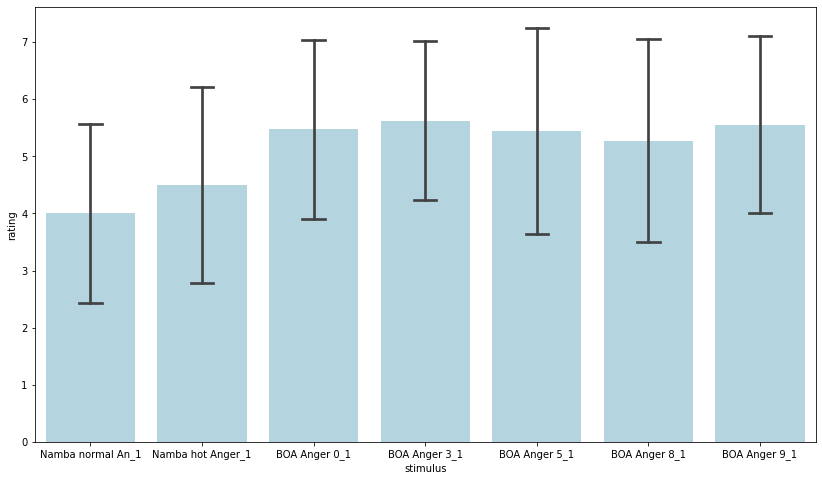

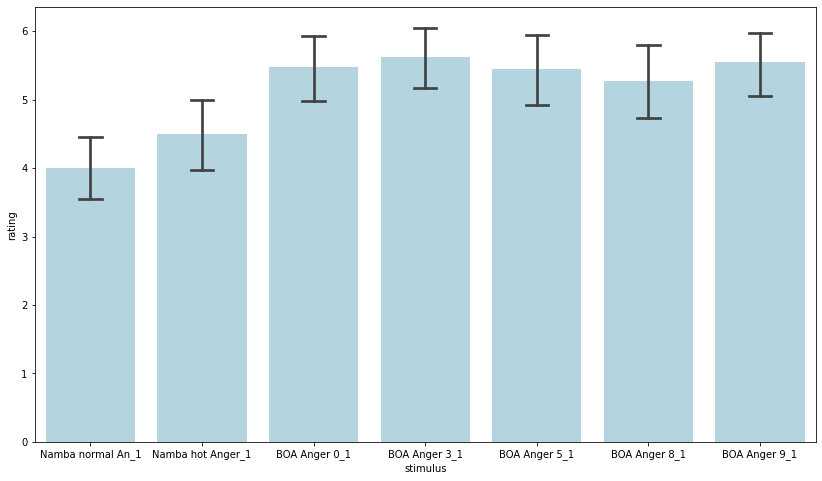

In [11]:
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# total_data
anger_data = total_data.iloc[:, 14:14+7*7].copy()
anger_data_with_an_rating = anger_data.iloc[:,[ 7 * x for x in range(7)]]
# print(anger_data_with_an_rating)
anger_data_with_an_rating = anger_data_with_an_rating.reset_index(drop=False)
# print(list(anger_data_with_an_rating.columns)[1:])
df = pd.melt(anger_data_with_an_rating, id_vars='index', value_vars=list(anger_data_with_an_rating.columns)[1:],
             var_name='stimulus', value_name='rating')
# print(df)

# Set the figure size
plt.figure(figsize=(14, 8))

# plot a bar chart
ax = sns.barplot(x="stimulus", y="rating", data=df, estimator=np.mean, ci='sd', capsize=.2, color='lightblue')

plt.figure(figsize=(14, 8))
ax2 = sns.barplot(x="stimulus", y="rating", data=df, estimator=np.mean, capsize=.2, color='lightblue')

# Disgust & the rest

In [52]:
emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
print(emo_names)

['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral']


In [4]:
#Then, do the multiple testing
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df['rating'], df['stimulus'])
print(mc.tukeyhsd().summary())
# Show the group names
print(mc.groupsunique)

# Instead of the Tukey's test, we can do pairwise t-test
# First, with the "Holm" correction
rtp = mc.allpairtest(stats.ttest_rel, method='Holm')
print((rtp[0]))

ModuleNotFoundError: No module named 'statsmodels'

No handles with labels found to put in legend.


current emo is  anger
current emo is  disgust
current emo is  fear
current emo is  happiness
current emo is  sadness
current emo is  surprise
current emo is  neutral
   stimulus  aver. human ratings  emotion    category
0     anger                    4    anger   Prototype
1     anger                    5    anger   Prototype
2     anger                    5    anger   Prototype
3     anger                    1    anger   Prototype
4     anger                    6    anger   Prototype
..      ...                  ...      ...         ...
75  neutral                    5  neutral  Our method
76  neutral                    2  neutral  Our method
77  neutral                    7  neutral  Our method
78  neutral                    5  neutral  Our method
79  neutral                    3  neutral  Our method

[560 rows x 4 columns]
error bar means  95% confidence interval


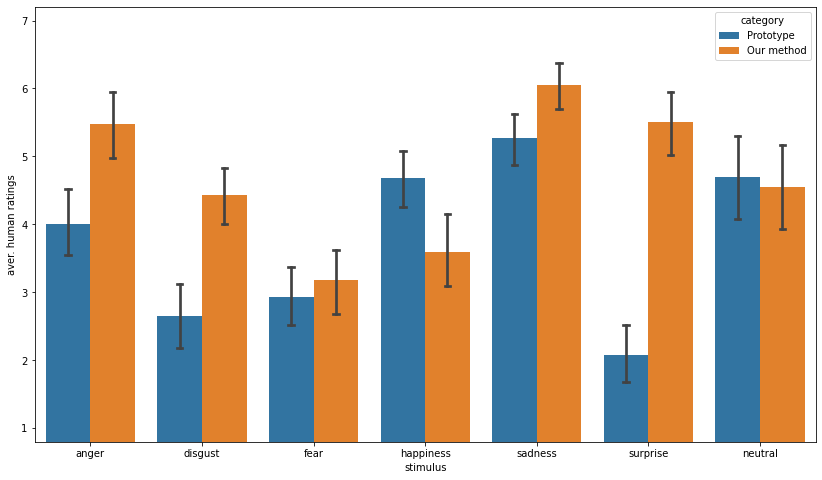

In [22]:
multiple_analysis_with_fig()

In [21]:


list(total_data.columns)
bar_group_num = 2
def multiple_analysis_with_fig(id=7):
#     emo_names = 'Anger*, Disgust*, Fear, Happiness*, Sadness*, Surprise*, Neutral'.lower().split(', ')
    emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
#     print(' Anger - 1 - 怒り,\n disgust 6 - 嫌悪,\n fear - 2 - 恐怖,\n happiness - 3 - 幸福, \n sadness - 4 - 悲しみ, \n surprise - 5 - 驚き,\n neutral - 7 - 中性')
#     print(total_data.iloc[0:2, :])
    def get_emo_num(name):
        if 'anger' in name.lower()  :
            return 0
        elif 'disgust' in name.lower() :
            return 5
        elif 'fear' in name.lower():
            return 1
        elif "happiness" in name.lower():
            return 2
        elif "sadness" in name.lower():
            return 3
        elif "surprise" in name.lower():
            return 4
        elif "neutral" in name.lower():
            return 6
            
    # New fig
    df = []
    flag = True
    for i in range(7):
        current_emo = emo_names[i]
        print('current emo is ', current_emo)
        temp_data = total_data.iloc[:, 14+7*7*i : 14+7*7*i + 7*7].copy()
#         print(temp_data)
        temp_data_with_temp_rating = temp_data.iloc[:,[ get_emo_num(current_emo) + 7 * x for x in [0, 2]]] # This line defined which data we use to generate the bar plot
#         print(temp_data_with_temp_rating.head())
        
        if flag:
#             print(type(df))
            df = pd.melt(temp_data_with_temp_rating, value_vars=list(temp_data_with_temp_rating.columns),
                     var_name='stimulus', value_name='aver. human ratings')
            df['emotion'] = current_emo
            flag = False
        else:
            temp_df = pd.melt(temp_data_with_temp_rating, value_vars=list(temp_data_with_temp_rating.columns),
                     var_name='stimulus', value_name='aver. human ratings')
            temp_df['emotion'] = current_emo
            df = pd.concat([df, temp_df], axis=0)
    
    category_list = []
    cate_ = ['Prototype', 'Our method']
    for i in range(7):
        for j in range(bar_group_num):
            for k in range(40):
                category_list.append(cate_[j])
    df['category']=category_list

    stim_name = [i for i in emo_names for _ in range(40 * bar_group_num)]
#     print(stim_name)
    df['stimulus']=stim_name
    print(df)
    fig, ax = plt.subplots(figsize=(14, 8)) # set figure size
    fig.set_facecolor('white') # set background color
#         plt.xlabel('stimulus')
#         plt.ylabel('aver. human ratings')
    plt.xlim(-0.05, 1.05)
    plt.ylim(0.8, 7.2)
#         plt.title(current_emo, y=-0.12)
    plt.legend()
    print('error bar means  95% confidence interval')
    ax = sns.barplot(x="stimulus", y="aver. human ratings", hue='category',  data=df, estimator=np.mean, ci=95, capsize=.05)

    fig.savefig('meanfor2.png', dpi=300)


# 
#     for i in range(7):
#         if i != id:, 
#             continue
#         current_emo = emo_names[i]
#         print('current emo is ', current_emo)
#         temp_data = total_data.iloc[:, 14+7*7*i : 14+7*7*i + 7*7].copy()
# #         print(temp_data)
#         temp_data_with_temp_rating = temp_data.iloc[:,[ get_emo_num(current_emo) + 7 * x for x in range(3)]]
# #         print(temp_data_with_temp_rating.iloc[:2, :2])
#         temp_data_with_temp_rating = temp_data_with_temp_rating.reset_index(drop=False)
# #         print(list(temp_data_with_temp_rating.columns)[:])
#         df = pd.melt(temp_data_with_temp_rating, id_vars='index', value_vars=list(temp_data_with_temp_rating.columns)[1:],
#                      var_name='stimulus', value_name='aver. human ratings')
# #         print(df)


# #         # Set the figure size
#         fig, ax = plt.subplots(figsize=(14, 8)) # set figure size
#         fig.set_facecolor('white') # set background color
# #         plt.xlabel('stimulus')
# #         plt.ylabel('aver. human ratings')
#         plt.xlim(-0.05, 1.05)
#         plt.ylim(0.8, 7.2)
# #         plt.title(current_emo, y=-0.12)
#         plt.legend()
#         print('error bar means standard deviation')
# #         # plot a bar chart
#         ax = sns.barplot(x="stimulus", y="aver. human ratings", hue='emotion', data=df, estimator=np.mean, ci='sd', capsize=.2, color='lightblue')
#         ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
    
#     fig.savefig('fig1.png', dpi=300)
    
    
#         print('error bar means 95% confidence interval')
#         fig, ax2 = plt.subplots(figsize=(14, 8)) # set figure size
#         fig.set_facecolor('white') # set background color
# #         plt.xlabel('stimulus')
#         plt.ylabel('aver. human ratings')
#         plt.xlim(-0.05, 1.05)
#         plt.ylim(0.8, 7.2)
#         plt.title(current_emo, y=-0.12)
#         plt.legend()
#         ax2 = sns.barplot(x="stimulus", y="aver. human ratings", data=df, estimator=np.mean, capsize=.2, color='lightblue')
#         fig.savefig('fig2.png', dpi=300)
        
#         plt.figure(figsize=(14, 8))
#         fig, ax3 = plt.subplots(figsize=(14, 8)) # set figure size
#         fig.set_facecolor('white') # set background color
# #         plt.xlabel('stimulus')
#         plt.ylabel('aver. human ratings')
#         plt.xlim(-0.05, 1.05)
#         plt.ylim(0.8, 7.2)
#         plt.title(current_emo, y=-0.12)
#         plt.legend()
#         ax3 = sns.boxplot(x="stimulus", y="aver. human ratings", data=df, color='lightblue')
# #         ax2.savefig
#         ax3 = sns.swarmplot(x="stimulus", y="aver. human ratings", data=df, color='#7d0013')
#         fig.savefig('fig3.png', dpi=300)
#         # ANOVA analysis
#         # one-way repeated measures ANOVA
#         # the within subject model 
#         import pingouin as pg
#         res = pg.rm_anova(dv='aver. human ratings', within='stimulus', subject='index', data=df, detailed=True)
#         print("one-way repeated measures ANOVA is:")
#         print(res)
        





No handles with labels found to put in legend.


current emo is  anger*
current emo is  disgust*
current emo is  fear
current emo is  happiness*
current emo is  sadness*
current emo is  surprise*
current emo is  neutral
    stimulus  aver. human ratings  emotion   category
0     anger*                    4   anger*  Prototype
1     anger*                    5   anger*  Prototype
2     anger*                    5   anger*  Prototype
3     anger*                    1   anger*  Prototype
4     anger*                    6   anger*  Prototype
..       ...                  ...      ...        ...
115  neutral                    5  neutral   BOA top1
116  neutral                    2  neutral   BOA top1
117  neutral                    7  neutral   BOA top1
118  neutral                    5  neutral   BOA top1
119  neutral                    3  neutral   BOA top1

[840 rows x 4 columns]
error bar means  95% confidence interval


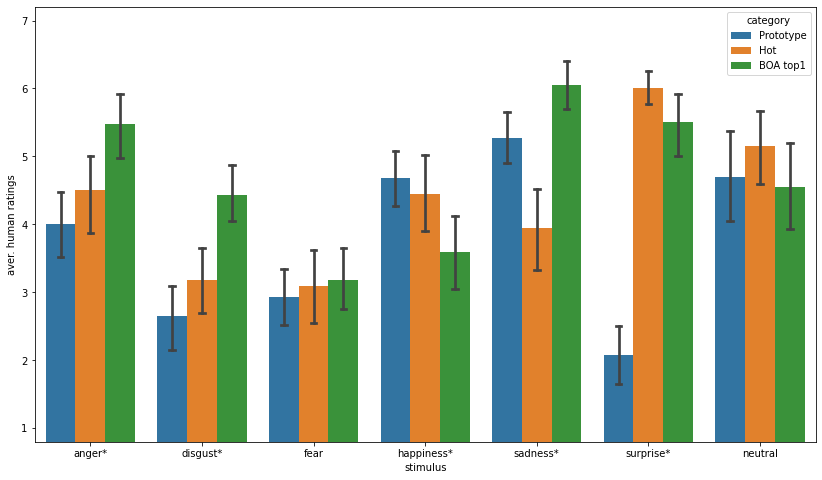

In [4]:
multiple_analysis_with_fig(7)

current emo is  disgust
error bar means standard deviation
error bar means 95% confidence interval


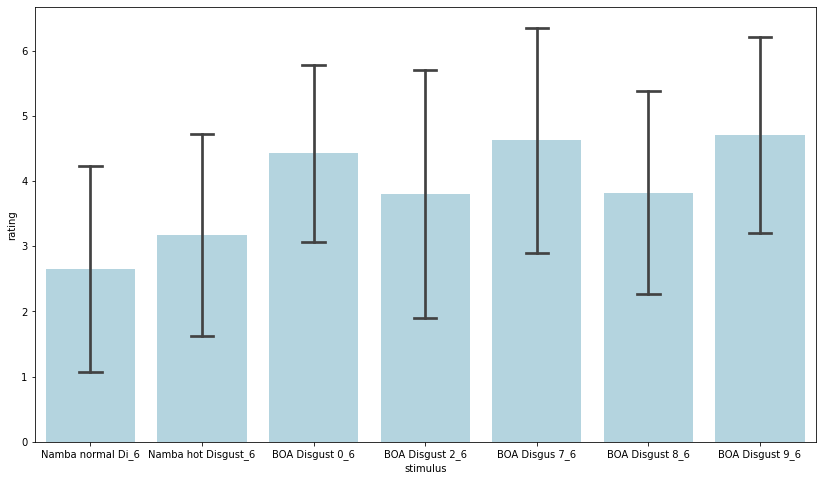

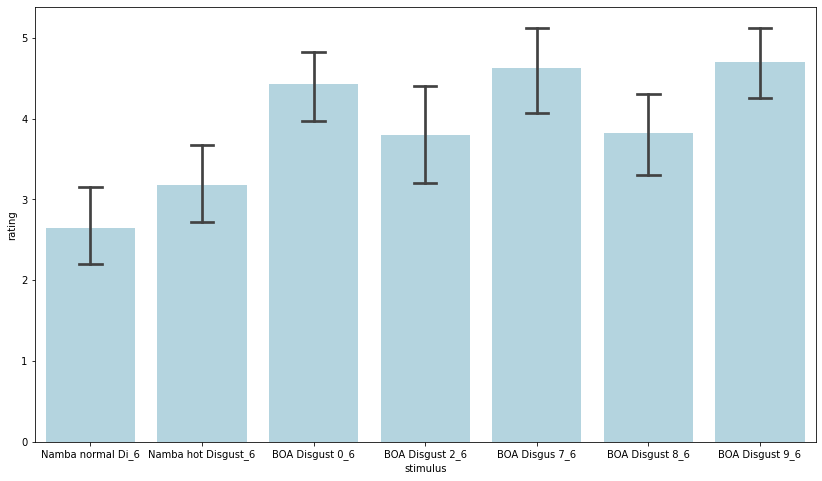

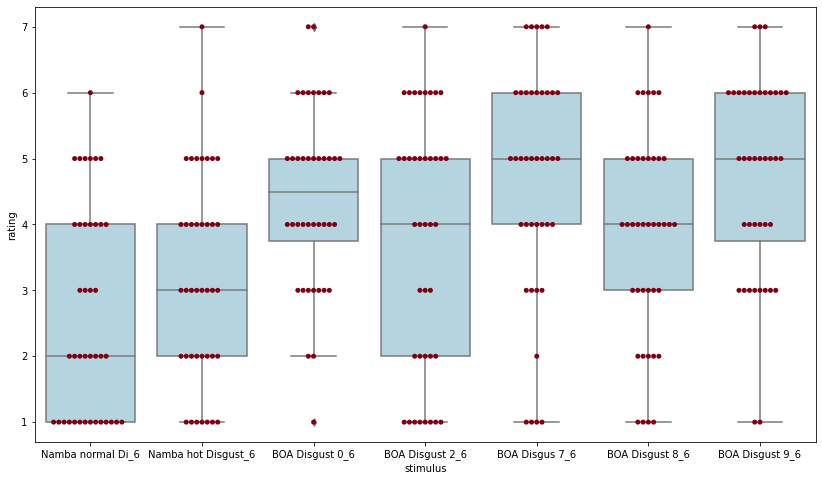

In [108]:
show_figure(1)

current emo is  fear
error bar means standard deviation
error bar means 95% confidence interval


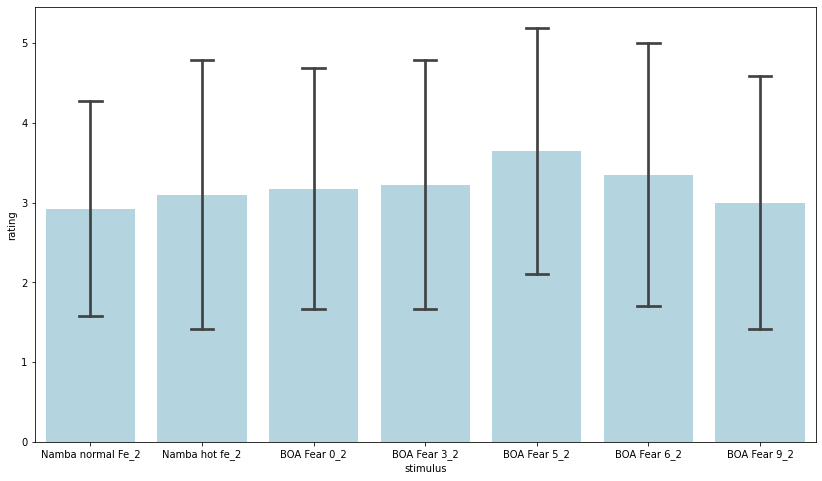

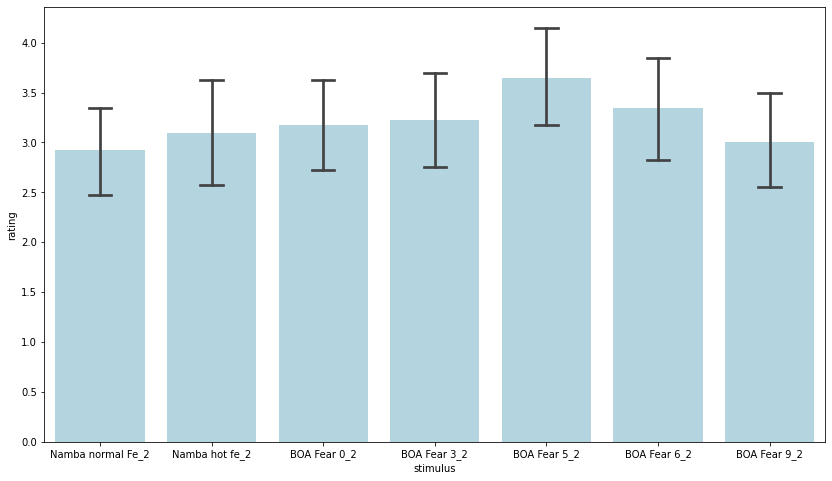

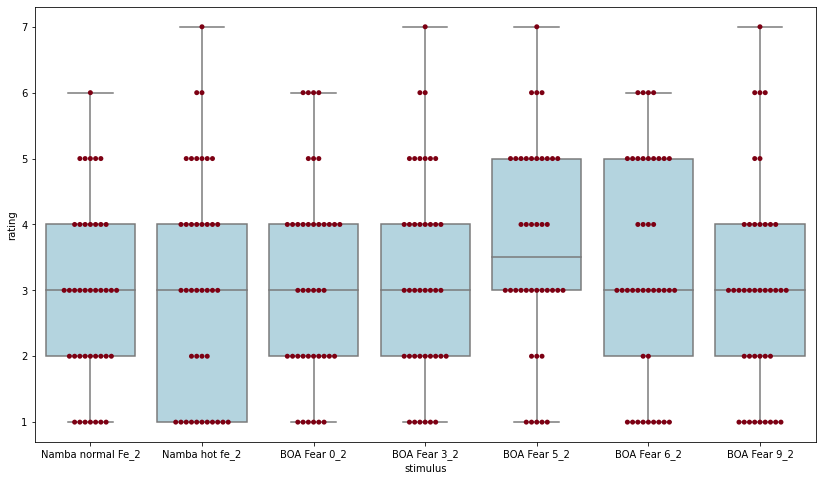

In [109]:
show_figure(2)

current emo is  happiness
error bar means standard deviation
error bar means 95% confidence interval


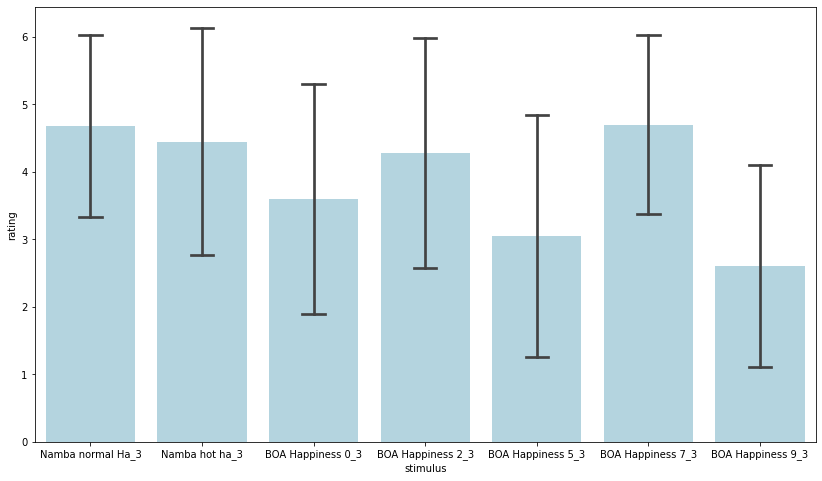

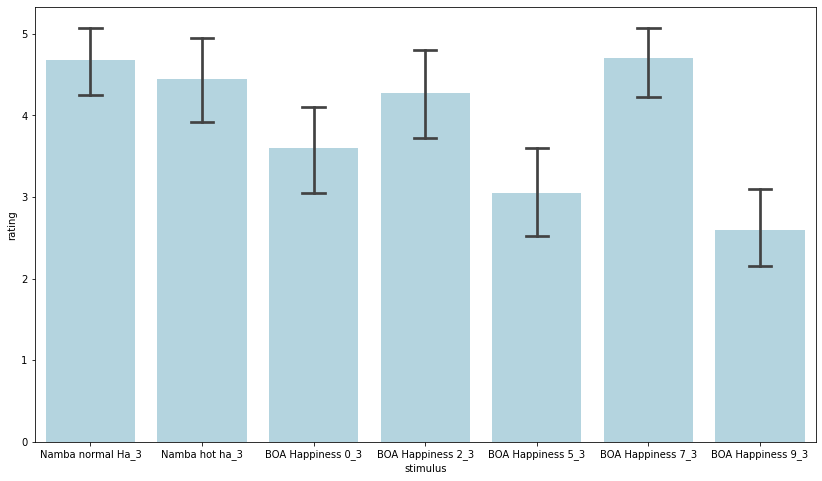

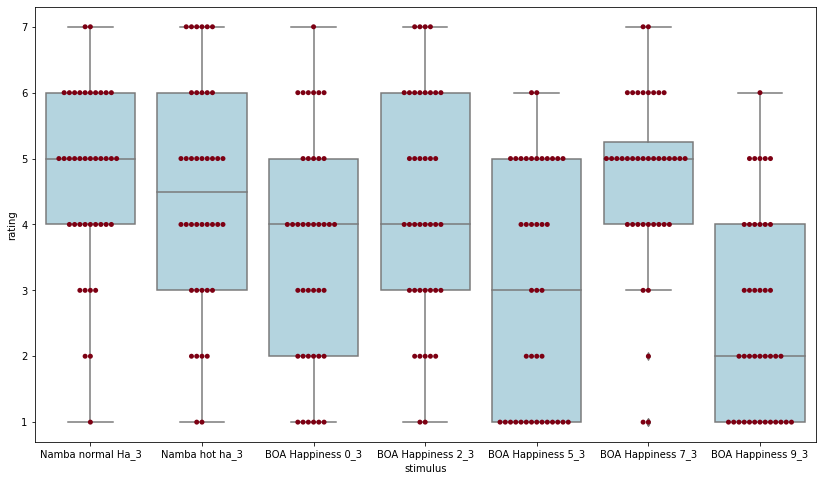

In [110]:
show_figure(3)

current emo is  sadness
error bar means standard deviation
error bar means 95% confidence interval


/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


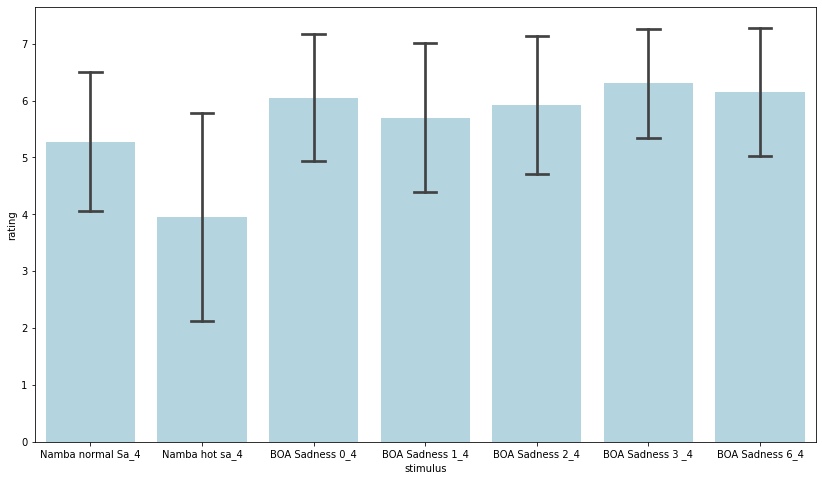

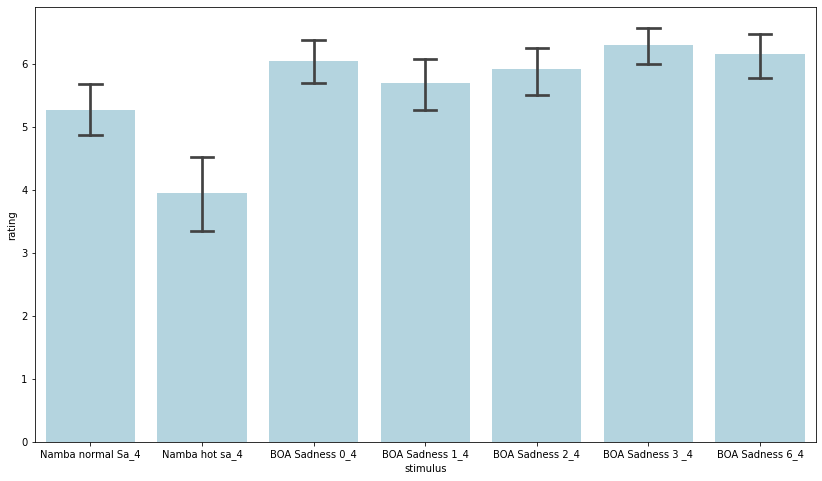

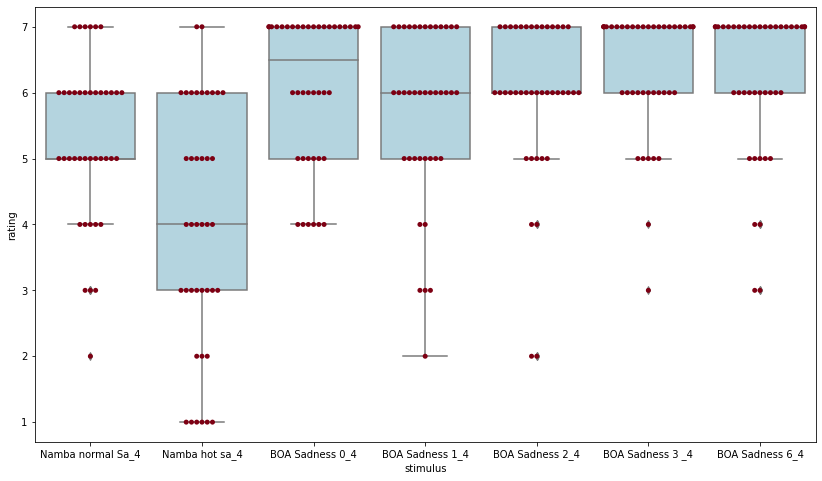

In [111]:
show_figure(4)

current emo is  surprise
error bar means standard deviation
error bar means 95% confidence interval


/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


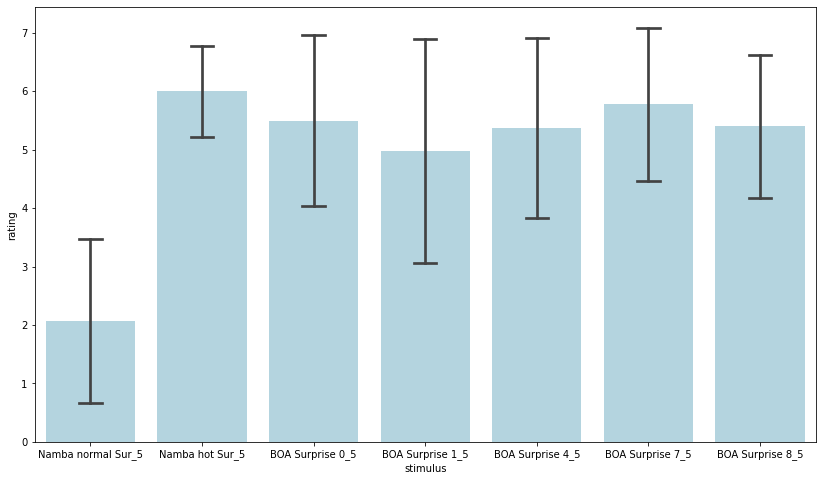

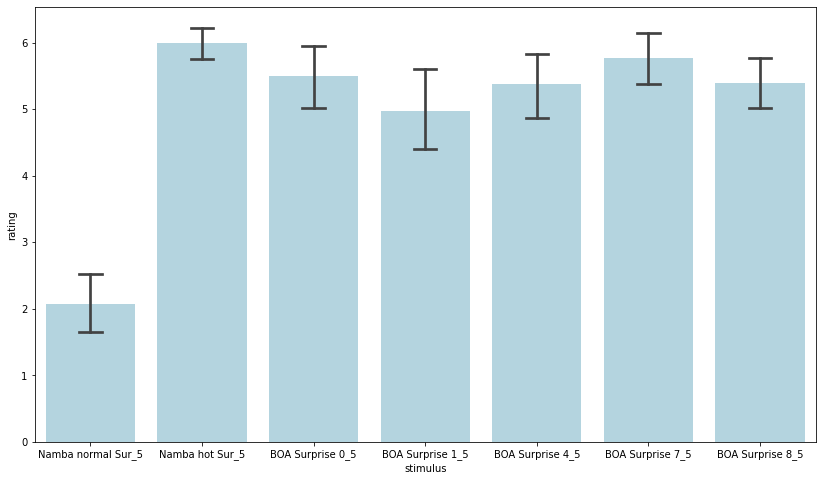

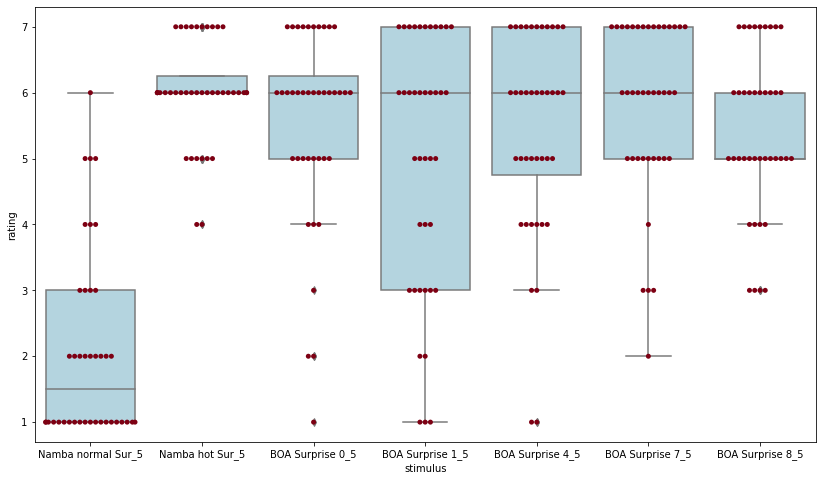

In [112]:
show_figure(5)

current emo is  neutral
error bar means standard deviation
error bar means 95% confidence interval


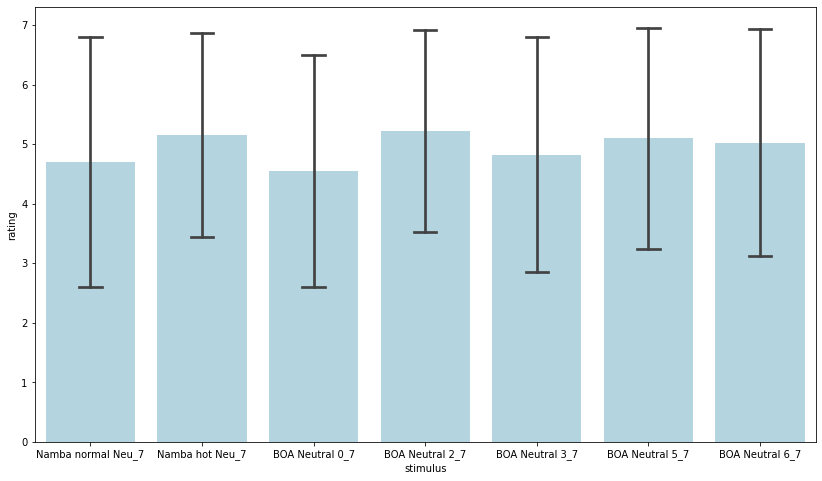

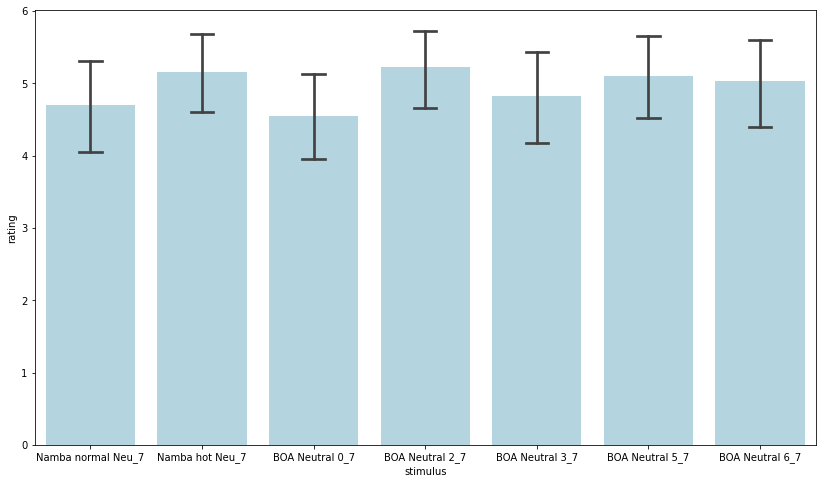

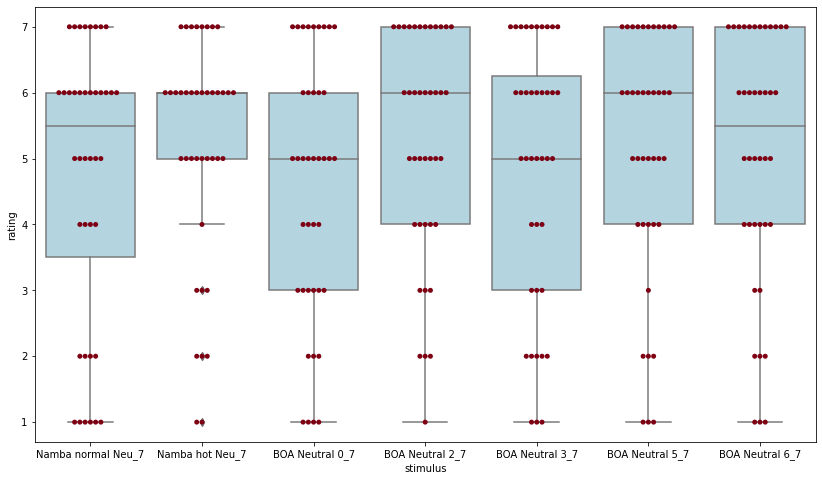

In [113]:
show_figure(6)

In [77]:
# show_figure(7)

In [ ]:
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# total_data

anger_data = total_data.iloc[:, 14:14+7*7].copy()
anger_data_with_an_rating = anger_data.iloc[:,[ 7 * x for x in range(7)]]
# print(anger_data_with_an_rating)
anger_data_with_an_rating = anger_data_with_an_rating.reset_index(drop=False)
print(list(anger_data_with_an_rating.columns)[1:])
df = pd.melt(anger_data_with_an_rating, id_vars='index', value_vars=list(anger_data_with_an_rating.columns)[1:],
             var_name='stimulus', value_name='rating')
print(df)

# Set the figure size
plt.figure(figsize=(14, 8))

# plot a bar chart
ax = sns.barplot(x="stimulus", y="rating", data=df, estimator=np.mean, ci='sd', capsize=.2, color='lightblue')

plt.figure(figsize=(14, 8))
ax2 = sns.barplot(x="stimulus", y="rating", data=df, estimator=np.mean, capsize=.2, color='lightblue')

# oneway ANOVA

In [10]:
anger_only_data = pd.read_csv('anger_only_data.csv')
# print(anger_only_data['Namba normal An_1'])
an_arr = anger_only_data.to_numpy()
# print(an_arr)
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(an_arr[0], an_arr[1], an_arr[2])
print("ANOVA F is:", fvalue, "\np value is:", pvalue)



ANOVA F is: 1.388888888888889 
p value is: 0.2980617117584766


# T-Test

In [ ]:
stats.ttest_1samp(a=)


In [11]:
# from statsmodels.stats.anova import AnovaRM

# #perform the repeated measures ANOVA
# print(AnovaRM(data=anger_only_data, depvar=[], subject=['id'], within=['anger']).fit())

In [77]:
practiceHA_data.mean(axis=0)

PracticeHA_1    1.675
PracticeHA_2    1.275
PracticeHA_3    5.425
PracticeHA_4    1.600
PracticeHA_5    1.350
PracticeHA_6    1.575
PracticeHA_7    2.450
dtype: float64